# GFER Lycopene - 72h
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [24]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [25]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [26]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [27]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [28]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.0
   pandas: 0.23.3
   seaborn: 0.9.0


## Runinng CellDoctor

In [29]:
# Define the protocol

channel_map = {"DAPI - DAPI": "NucliChannel",
               "Cy3 - Cy3": ["SemiCytoChannel", "ActinChannel"],
               "Cy5 - Cy5": "MitoTrackerChannel",
               "FITC - FITC": "GferChannel",
               "DataExtractors": [{"class": "NucliDataExtractor", "data_sources": ["Nucli"],
                       "trigger_after": "Nucli"},
                      {"class": "NucliCytoDataExtractor", "data_sources": ["Nucli", "Cyto"],
                       "trigger_after": "Nucli"},
                      {"class": "SemiCytoImageUnification", "data_sources": ["Cyto", "Nucli", "GFER", "MitoTracker"],
                       "trigger_after": "Nucli"},
                      {"class": "CytoDataExtractor", "data_sources": ["Cyto"],
                       "trigger_after": "Cyto"},
                      {"class": "MitoTrackerDataExtractor", "data_sources": ["MitoTracker"],
                       "trigger_after": "MitoTracker"},                                 
                      {"class": "AntiBodyDataExtractor", "data_sources": ["GFER"],
                       "trigger_after": "GFER"},
                      {"class": "AntiBodyDataExtractor", "data_sources": ["Actin"],
                       "trigger_after": "Actin"},
                      {"class": "ContoursExporter", "data_sources": ["Cyto"],
                       "trigger_after": "Cyto"},                                  
                      {"class": "AntiBodyCoLocalizationDataExtractor", "data_sources": ["GFER", "Nucli"],
                       "trigger_after": "GFER"},
                      {"class": "AntiBodyCoLocalizationDataExtractor", "data_sources": ["GFER", "MitoTracker"],
                       "trigger_after": "GFER"}]
               }


In [30]:
# Running folder loader
import os, sys
segmenter_path = "C:\\Code\\CellDoctor"
sys.path.append(segmenter_path) 

from Segmenter.FolderLoader import FolderLoader 


images_path = "G:\\BioData\\Experiments\\Images\\lyco and comp\\Standard lab acquisition protocol GFER IF\\Standard lab acquisition protocol GFER IF_lyco72h_mitogferandcox280119_1"
# FolderLoader(images_path, protocol_channel_map=channel_map, parallel_processing=False, continue_existing_session=True)


In [31]:
from Segmenter.DataProcessor.ImageDataUnifier import ImageDataUnifier

results_path = images_path+'\\results'


unification_protocol = [("base", {"ch_type": "Nucli"}),
                         ("join", {"ch_type": "Cyto", "full_tbl_fld": "cyto_label"}),
                         ("join", {"ch_type": "GFER", "full_tbl_fld": "cyto_label"}),
                         ("join", {"ch_type": "Actin", "full_tbl_fld": "cyto_label"}),
                         ("join_agg", {"ch_type": "MitoTracker", "full_tbl_fld": "cyto_label"}),
                        ]

# ImageDataUnifier(folder_path=results_path,unification_protocol=unification_protocol)

# General

In [32]:
patients = {"AV": {'age': 6*4, "gender": "M", "color": "cornflowerblue"}, 
            "EV": {"age": 5.5*12*4, "gender": "F", "color": "violet"},
            "HC CM": {"age": 6*12*4, "gender": "F", "color": "green"},
            "AG044": {"age": 15, "gender": "F", "color": "limegreen"},
            "AG015": {"age": 3/7, "gender": "M", "color": "cyan"},
            "HV": {"age": 37*12*4, "gender": "F", "color": "darkviolet"},
            "MV": {"age": 36.5*12*4, "gender": "M", "color": "royalblue"},
            "HC IK": {"age": 32*12*4, "gender": "F", "color": "gray"},
            "HC OZ": {"age": 35*12*4, "gender": "M", "color": "yellow"},
            "HC NA0730":{"age": 53*12*4, "gender": "M", "color": "coral"},
            "HD":{"age": np.nan, "gender": np.nan, "color": "orange"}}
patients_df = pd.DataFrame(patients).T
patients_df

age           color gender
AV               24  cornflowerblue      M
EV              264          violet      F
HC CM           288           green      F
AG044            15       limegreen      F
AG015      0.428571            cyan      M
...             ...             ...    ...
MV             1752       royalblue      M
HC IK          1536            gray      F
HC OZ          1680          yellow      M
HC NA0730      2544           coral      M
HD              NaN          orange    NaN

[11 rows x 3 columns]

# Loading the data

In [33]:
data_path = "../Data/Lyco/72h/agg_results.csv"
df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)

In [34]:
df.sample(7)

Actin_avg  Actin_max  Actin_q10  Actin_q50  Actin_q90  Actin_size  Actin_std  Actin_sum  Cyto_area  Cyto_aspect_ratio   Cyto_avg  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  Cyto_extent  Cyto_h  Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter  Cyto_q10  Cyto_q50  Cyto_q90  Cyto_rect_area  Cyto_size  Cyto_solidity   Cyto_std   Cyto_sum  Cyto_w   GFER_avg  GFER_in_MitoTracker_avg  GFER_in_MitoTracker_max  GFER_in_MitoTracker_q10  GFER_in_MitoTracker_q50  GFER_in_MitoTracker_q90  GFER_in_MitoTracker_size  GFER_in_MitoTracker_std  GFER_in_Nucli_avg  GFER_in_Nucli_max  GFER_in_Nucli_q10  GFER_in_Nucli_q50  GFER_in_Nucli_q90  GFER_in_Nucli_size  GFER_in_Nucli_std  GFER_max  GFER_outside_MitoTracker_avg  GFER_outside_MitoTracker_max  GFER_outside_MitoTracker_q10  GFER_outside_MitoTracker_q50  GFER_outside_MitoTracker_q90  GFER_outside_MitoTracker_size  GFER_outside_MitoTracker_std  GFER_outside_Nucli_avg  GFER_outside_Nucli_max  GFER_outside_Nucli_q10  \
33317  32.263064      185.0        7.0       27.0       62.0     22907.0  24.759068   739050.0    29836.5           0.844720  44.204200                     0.246138    906.0    609.0     0.340662   322.0     176.0                   125742.373316     1867.335129       2.0      41.0      98.0         87584.0    30950.0       0.654001  37.078073  1368120.0   272.0  37.771504                39.676164                    199.0                      2.0                     25.0                    106.0                   19303.0                39.961034          74.407328              176.0               25.0               71.0              118.0              2784.0          33.858712     199.0                      4.348182                          60.0                           2.0                           2.0                          13.0                         1100.0                      5.579316               31.982632                   199.0                     2.0   
41449  17.791378       89.0        4.0       14.0       36.0     10531.0  13.997364   187361.0    33784.0           3.901408  27.103088                     0.138406   1633.0   1283.0     0.429450   142.0     126.0                   249858.889100     1642.097541       5.0      22.0      50.0         78668.0    34582.0       0.623908  22.696947   937279.0   554.0  42.841153                42.988971                    255.0                     17.0                     35.0                     87.0                    4443.0                32.715142          37.328378              157.0               17.0               35.0               70.0               740.0          23.622573     255.0                     22.939394                          52.0                          17.0                          17.0                          35.0                           33.0                     10.377538               43.933084                   255.0                    17.0   
62247  10.186871       32.0        3.0       10.0       17.0      7952.0   5.530966    81006.0    12207.5           0.535714  23.420582                     0.250889    370.0    488.0     0.358833   252.0      93.0                    50388.871534      950.256921       3.0      16.0      55.9         34020.0    12642.0       0.552776  22.162722   296083.0   135.0  17.496082                18.696338                     73.0                      3.0                     19.0                     34.0                    7100.0                11.414195          20.611870               61.0                7.0               19.0               34.0              2561.0           9.468174      73.0                      5.055474                          19.0                           3.0                           3.0                          11.0                          685.0                      3.253273               15.968606                    73.0                     3.0   
4926    8.992606       77.0        3.0        8.0       15.0     24885.0   5.540008

## Transforming the experiment specifics

<img src="../Data/Lyco/48h/IMG_20190212_152741.jpg"  style="width: 800px; height: 400px"/>

In [35]:
# Replacing the name GFER with AntiBody as the plate contain also Cox17
df.columns = df.columns.str.replace("GFER", "AntiBody")

In [36]:
# Adding patients name
col_map = {2:"AV", 3:"AV", 4:"EV", 5:"EV", 6:"AG015", 7:"AG015", 8:"HC CM", 9:"HC CM", 10:"HD", 11:"HD"}
df["patient"] = df.column.map(col_map)

In [37]:
# Adding Antibodies names
df["AntiBodyType"] = np.nan
df.loc[df.row=='B', "AntiBodyType"] = "GFER"
df.loc[df.row=='C', "AntiBodyType"] = "Cox17"

df.loc[df.column.isin([2,4,6,8,10]) & df.row.isin(['D', 'F']), "AntiBodyType"] = "GFER"
df.loc[df.column.isin([3,5,7,9,11]) & df.row.isin(['D', 'F']), "AntiBodyType"] = "Cox17"

df.loc[df.column.isin([3,5,7,9,11]) & df.row.isin(['E']), "AntiBodyType"] = "GFER"
df.loc[df.column.isin([2,4,6,8,10]) & df.row.isin(['E']), "AntiBodyType"] = "Cox17"
df.loc[df.row=='G', "AntiBodyType"] = "Cox17"

df["AntiBodyType"].isna().any()

False

In [38]:
antibody_plate = df.groupby(['column', 'row']).AntiBodyType.first().unstack(level=-1).T
antibody_plate 

column     2      3      4      5      6      7      8      9      10     11
row                                                                         
B        GFER   GFER   GFER   GFER   GFER   GFER   GFER   GFER   GFER   GFER
C       Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17
D        GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17
E       Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER
F        GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17   GFER  Cox17
G       Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17  Cox17

In [39]:
# Adding Compunds and concentration 
df["Compound"] = np.nan
df.loc[(df.row.isin(['B', 'C'])) & (df.column.isin([2,4,6,8,10])), "Compound"] = "Control"
df.loc[(df.row.isin(['D', 'E'])) & (df.column.isin([2,4,6,8,10])), "Compound"] = "DMSO"
df.loc[(df.row.isin(['F', 'G'])) & (df.column.isin([2,4,6,8,10])), "Compound"] = "Lyco Low"
df.loc[(df.row.isin(['B', 'C', 'D'])) & (df.column.isin([3,5,7,9,11])), "Compound"] = "Lyco Medium"
df.loc[(df.row.isin(['E', 'F', 'G'])) & (df.column.isin([3,5,7,9,11])), "Compound"] = "Lyco High"
df["Compound"].isna().any()

False

In [40]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column        2            3         4            5         6            7         8            9         10           11
row                                                                                                                      
B        Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium
C        Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium   Control  Lyco Medium
D           DMSO  Lyco Medium      DMSO  Lyco Medium      DMSO  Lyco Medium      DMSO  Lyco Medium      DMSO  Lyco Medium
E           DMSO    Lyco High      DMSO    Lyco High      DMSO    Lyco High      DMSO    Lyco High      DMSO    Lyco High
F       Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High
G       Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High  Lyco Low    Lyco High

# Number of cells 


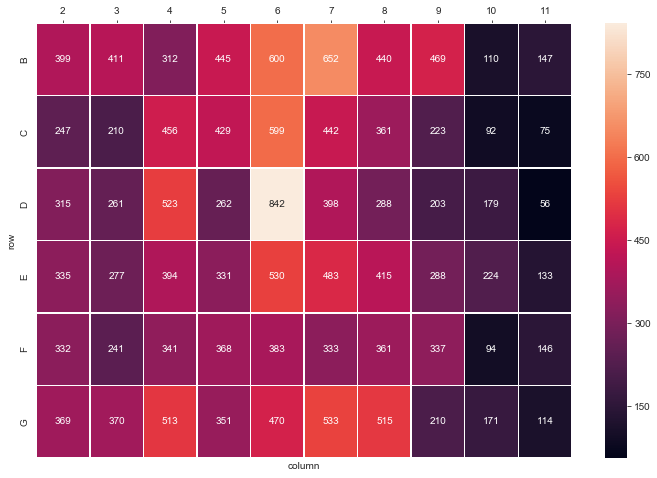

In [41]:
cell_in_well = df.groupby(["row", "column"])["AntiBodyType"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

In [42]:
order = ['Control', 'DMSO', 
         'Lyco Low', 'Lyco Medium', 'Lyco High'
        ]

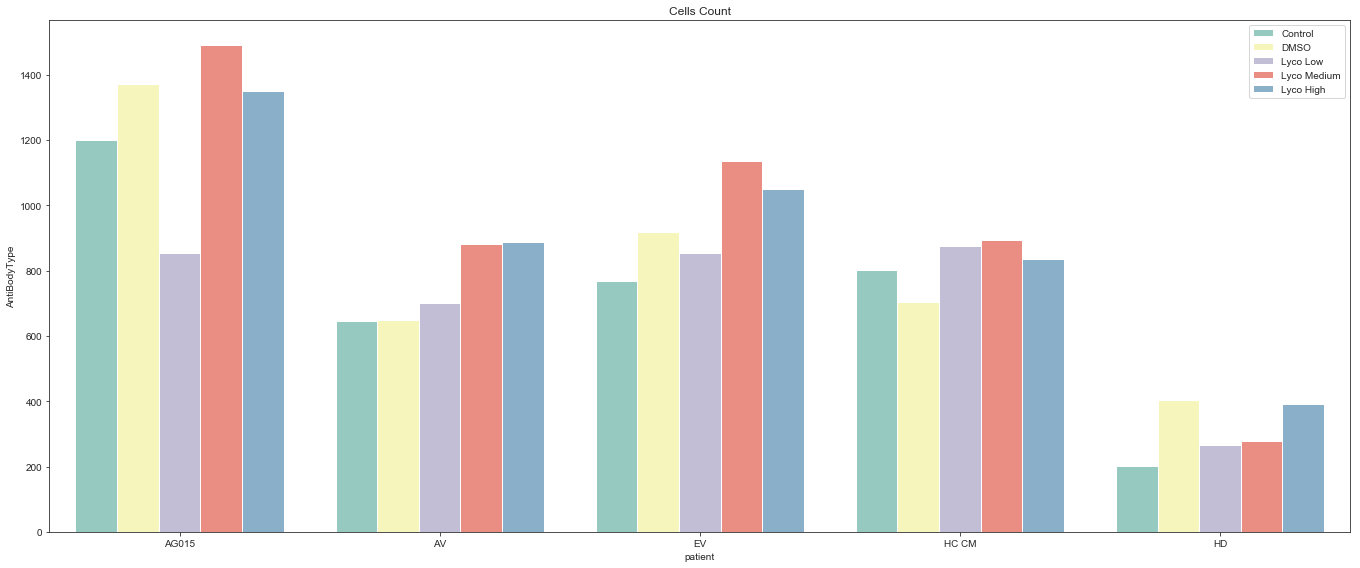

In [43]:
g = df.groupby(["row", "column", "patient", "Compound"])["AntiBodyType"].count()
g = g.groupby(["patient", "Compound"]).mean().reset_index()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="patient", y="AntiBodyType", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cells Count")
ax.legend(loc = 1)
plt.tight_layout()


In 72h Lycopene it seems like we have an over dose in the high concentration (except maybe HD which react well to it).  
  
**Questions:**  
*   
  
**TODO:**  
*  
  

# Analyzing the features

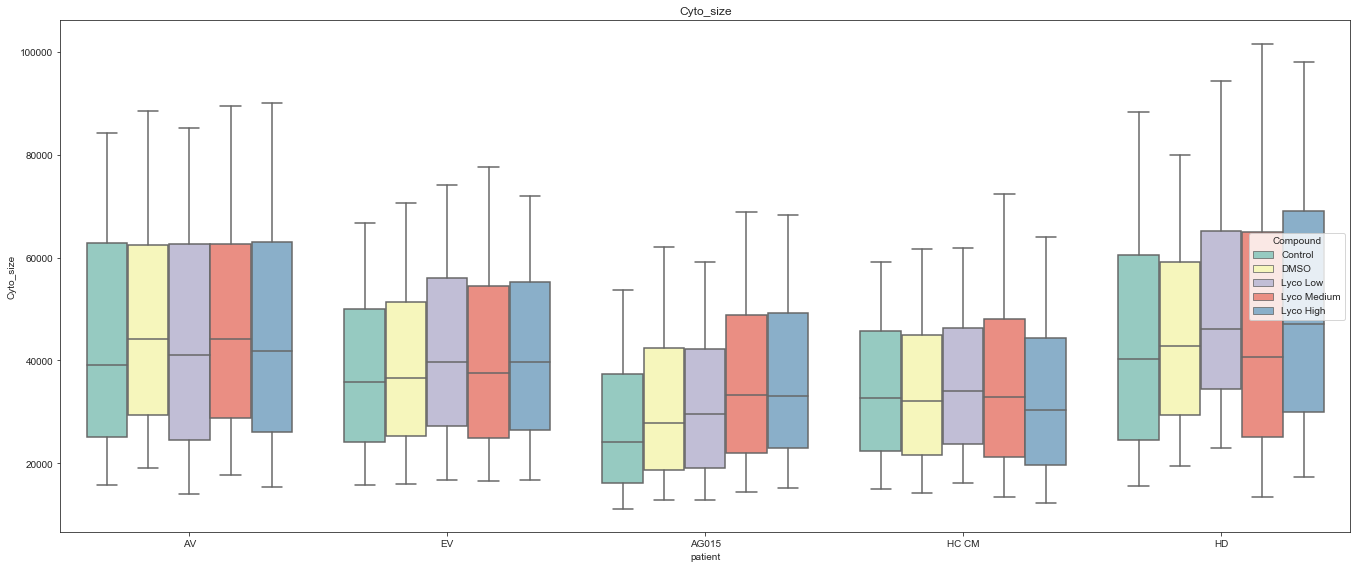

In [44]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="patient", y="Cyto_size", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

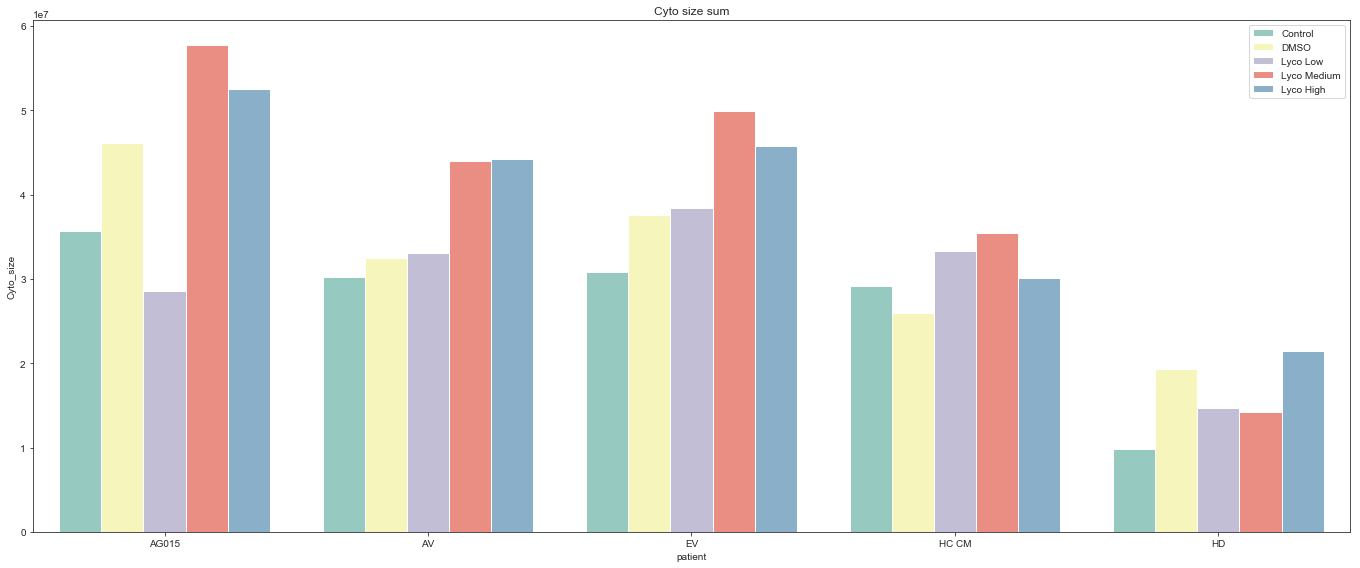

In [47]:
g = df.groupby(['patient', 'Compound'])["Cyto_size"].sum().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="patient", y="Cyto_size", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cyto size sum")
ax.legend(loc = 1)
plt.tight_layout()


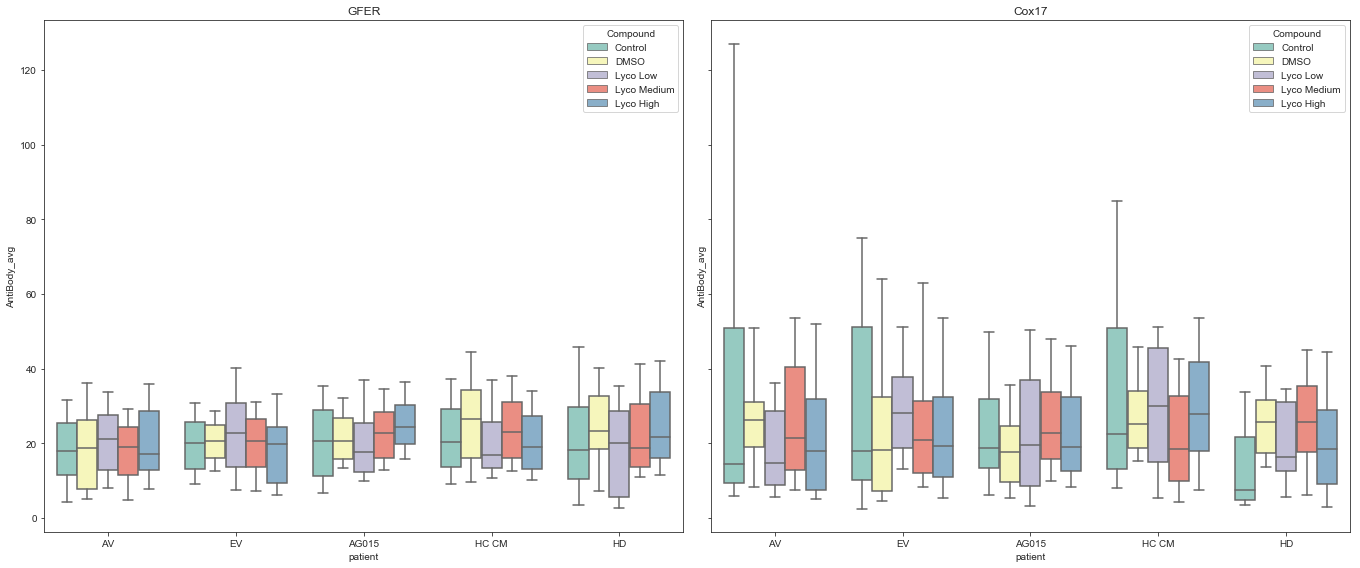

In [48]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_avg", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType)
plt.tight_layout()

* Why DMSO created this effect? 
* Cox17 seems weird?
* Search anomalies and look at the photos

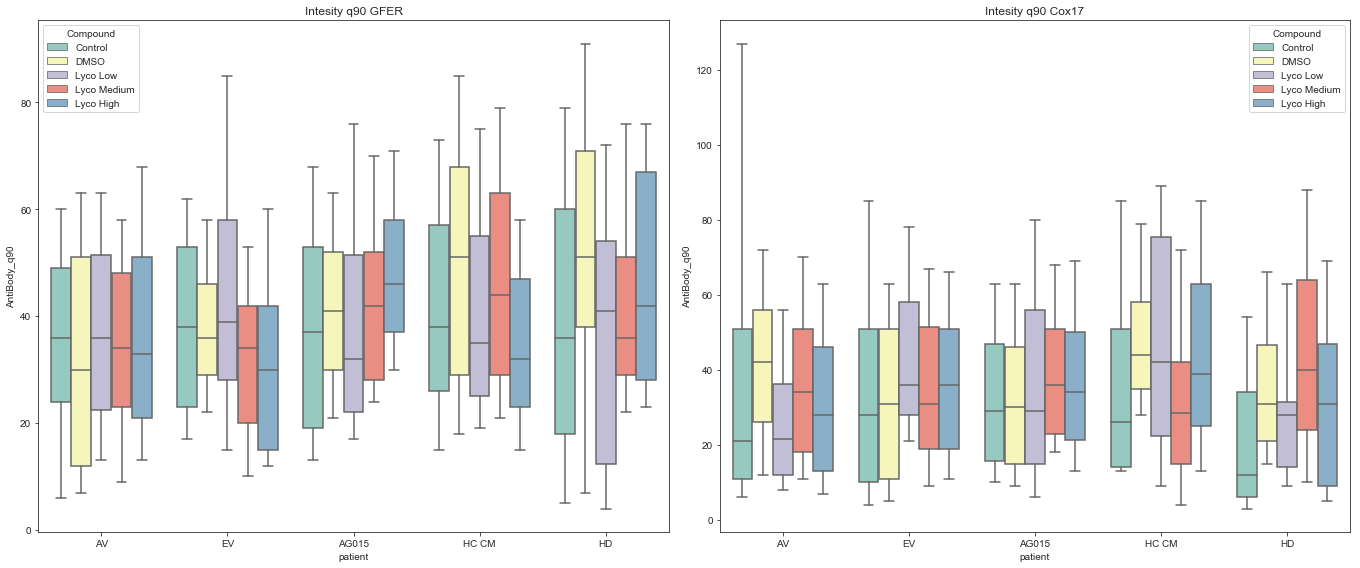

In [49]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_q90", hue="Compound",  data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title("Intesity q90 "+abType)
plt.tight_layout()

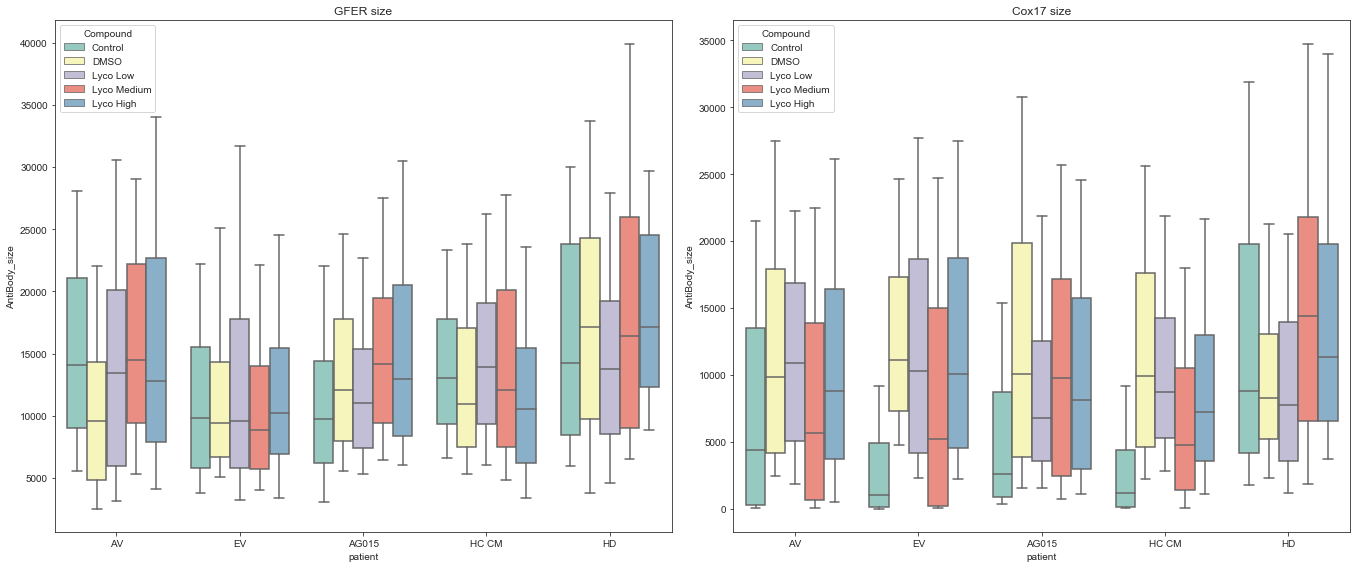

In [50]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_size", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(f"{abType} size")
plt.tight_layout()

**TODO:**  
* Do Cox17 significance tests

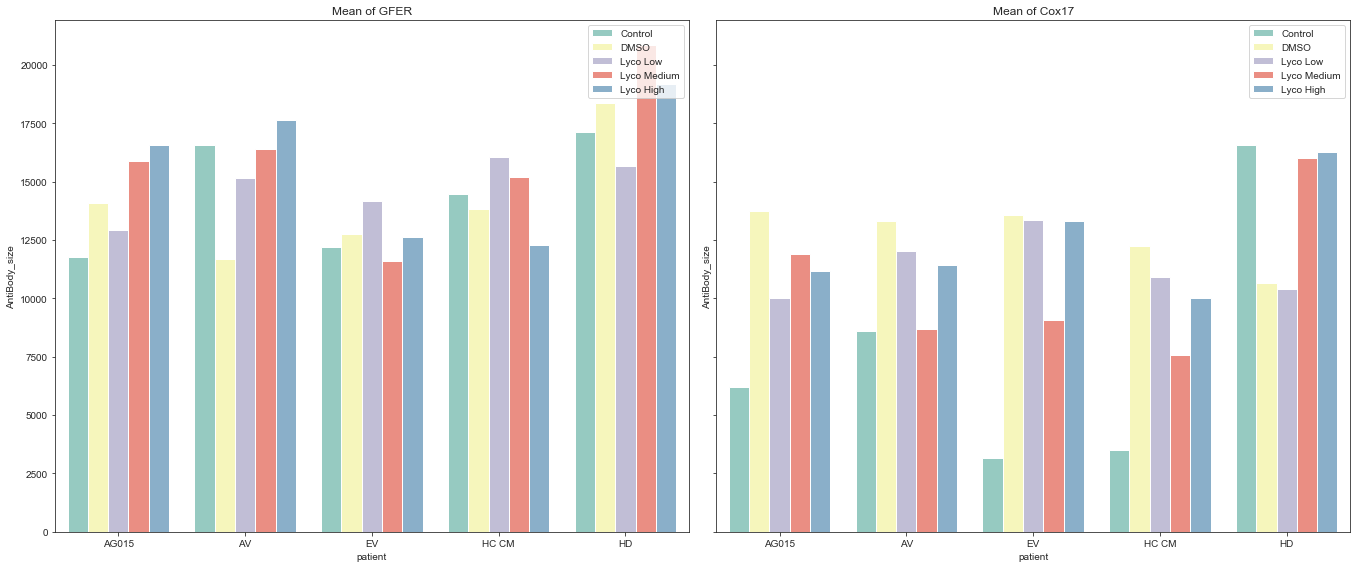

In [51]:
g=df.groupby(['AntiBodyType', 'patient' , 'Compound'], as_index=False)["AntiBody_size"].mean()


sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.barplot(x="patient", y="AntiBody_size", hue="Compound", data=g[g.AntiBodyType==abType], palette="Set3" ,ax=ax[i], ci=None, hue_order=order);
    ax[i].set_title("Mean of "+abType)
    ax[i].legend(loc = 1)
plt.tight_layout()

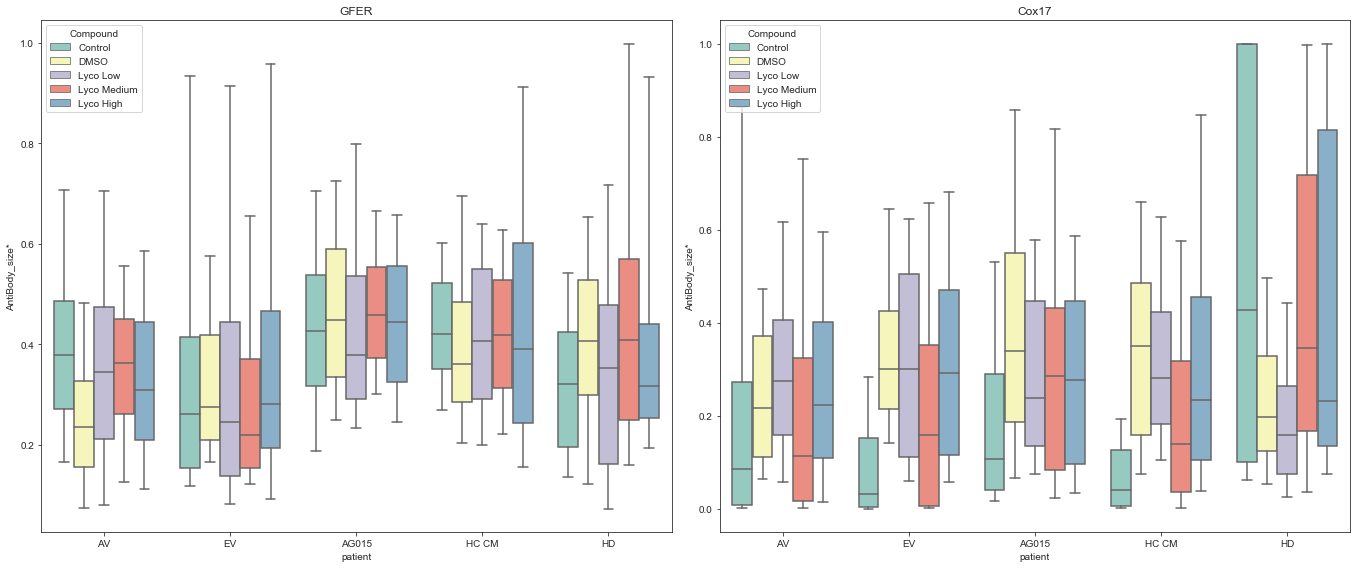

In [52]:
df['AntiBody_size*'] = df['AntiBody_size']/df['Cyto_size']

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_size*", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType)
plt.tight_layout()

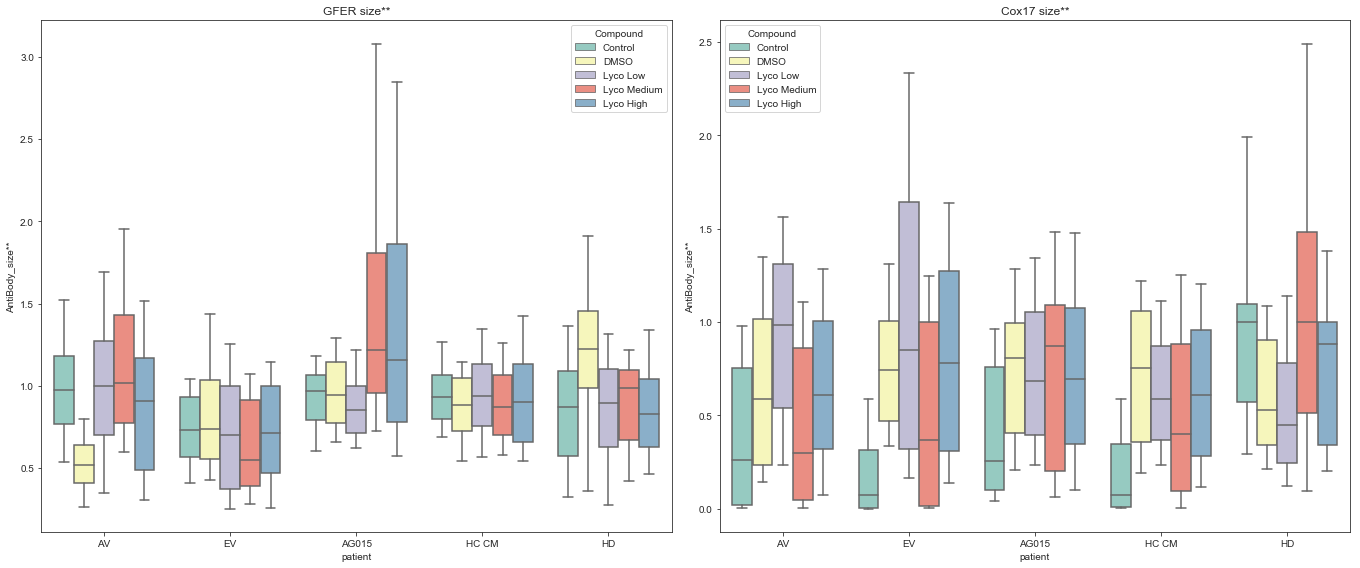

In [53]:
df['AntiBody_size**'] = df['AntiBody_size']/df['MitoTracker_size_sum']

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_size**", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType+" size**")
plt.tight_layout()

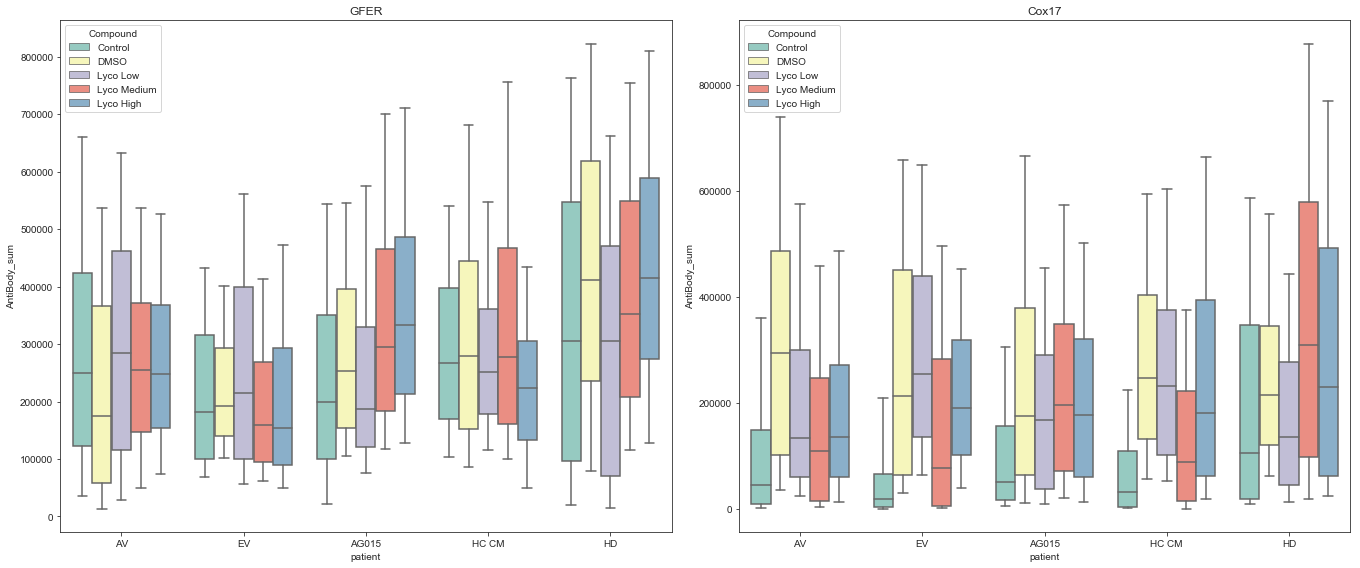

In [54]:
# AntiBody IxA
df['AntiBody_sum'] = df['AntiBody_avg']*df['AntiBody_size']

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_sum", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType)
plt.tight_layout()

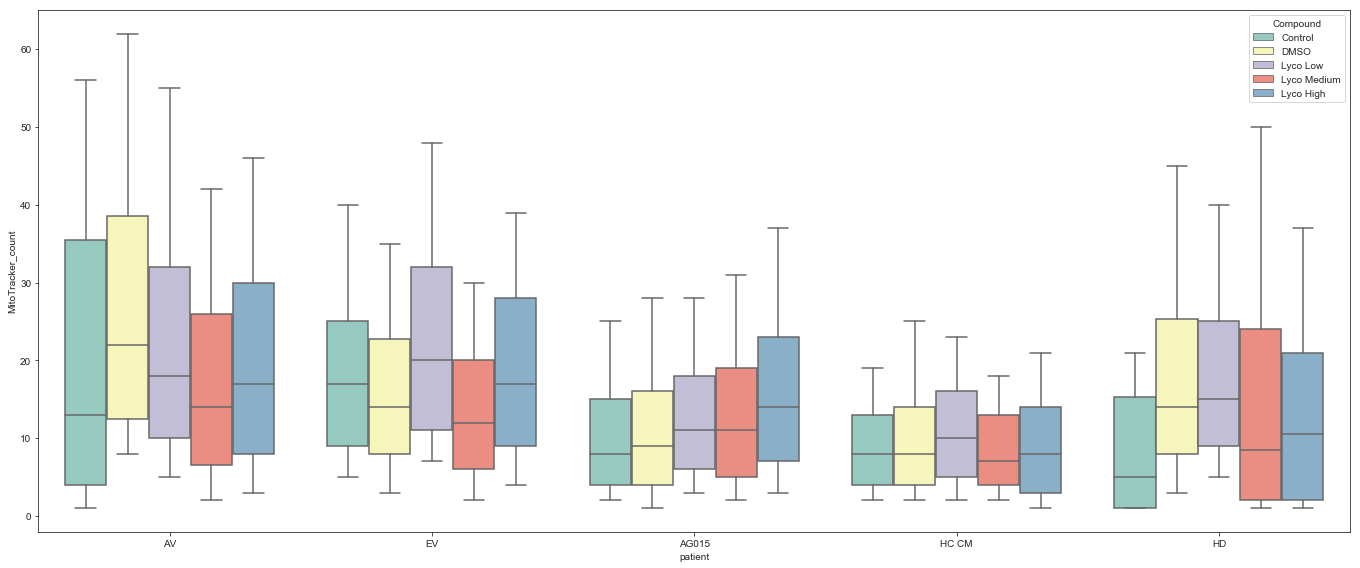

In [55]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_count", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

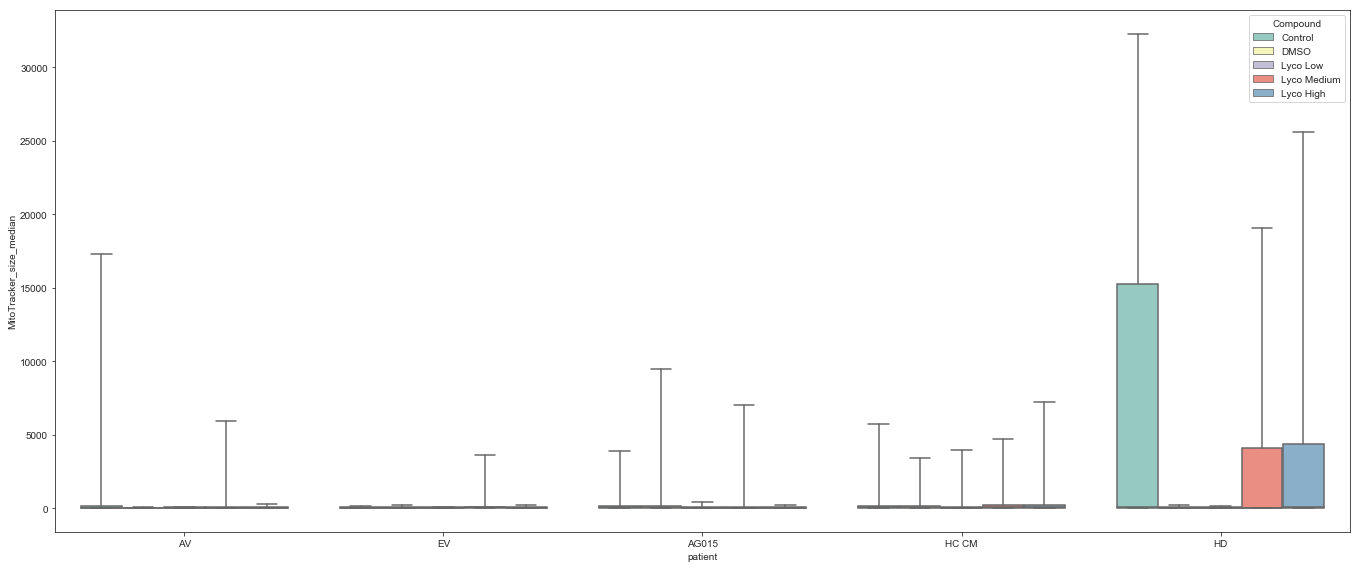

In [56]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_median", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

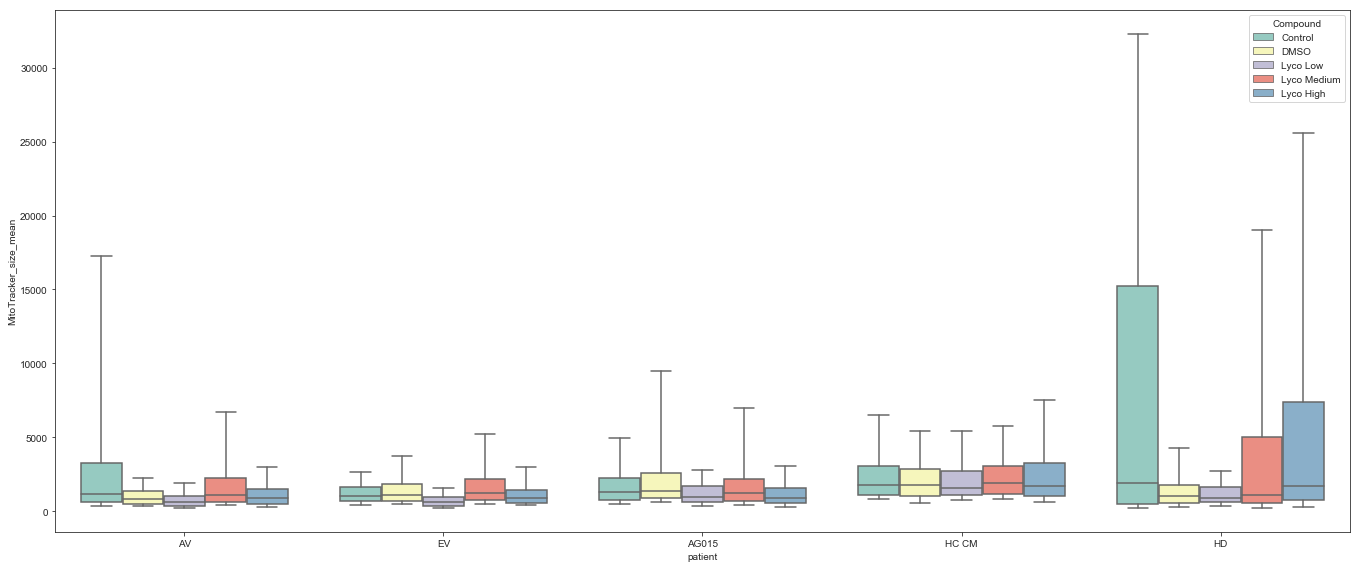

In [57]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_mean", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

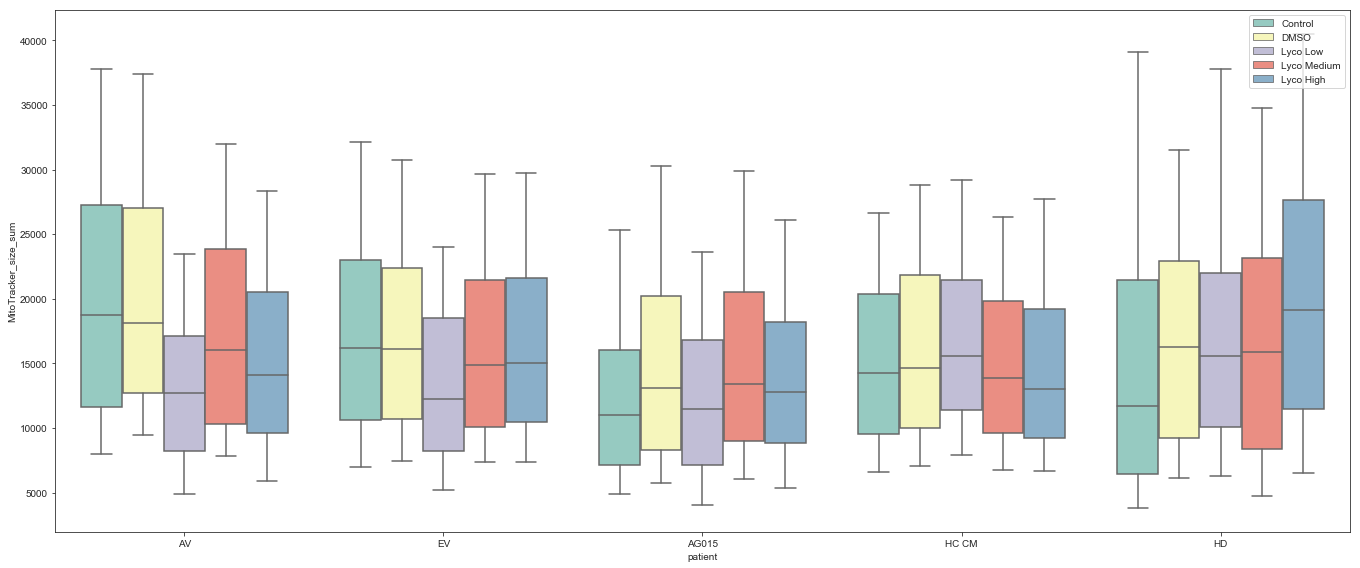

In [58]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_sum", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.legend(loc=1)
plt.tight_layout()

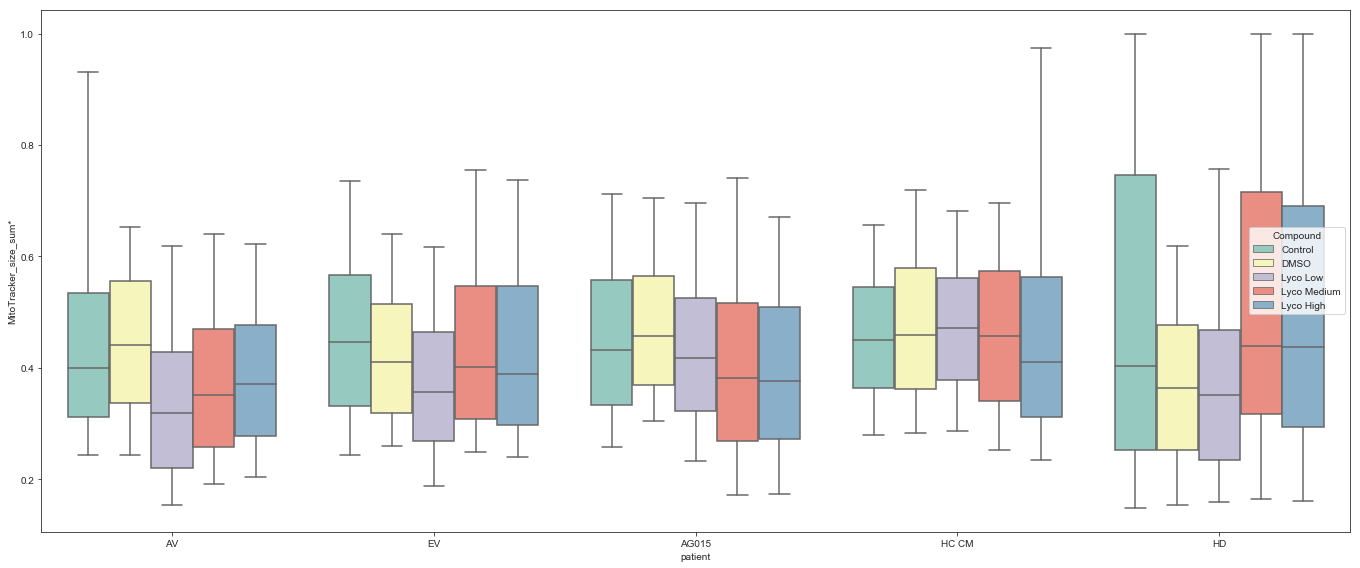

In [59]:
df['MitoTracker_size_sum*'] = df['MitoTracker_size_sum']/df['Cyto_size']

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_sum*", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

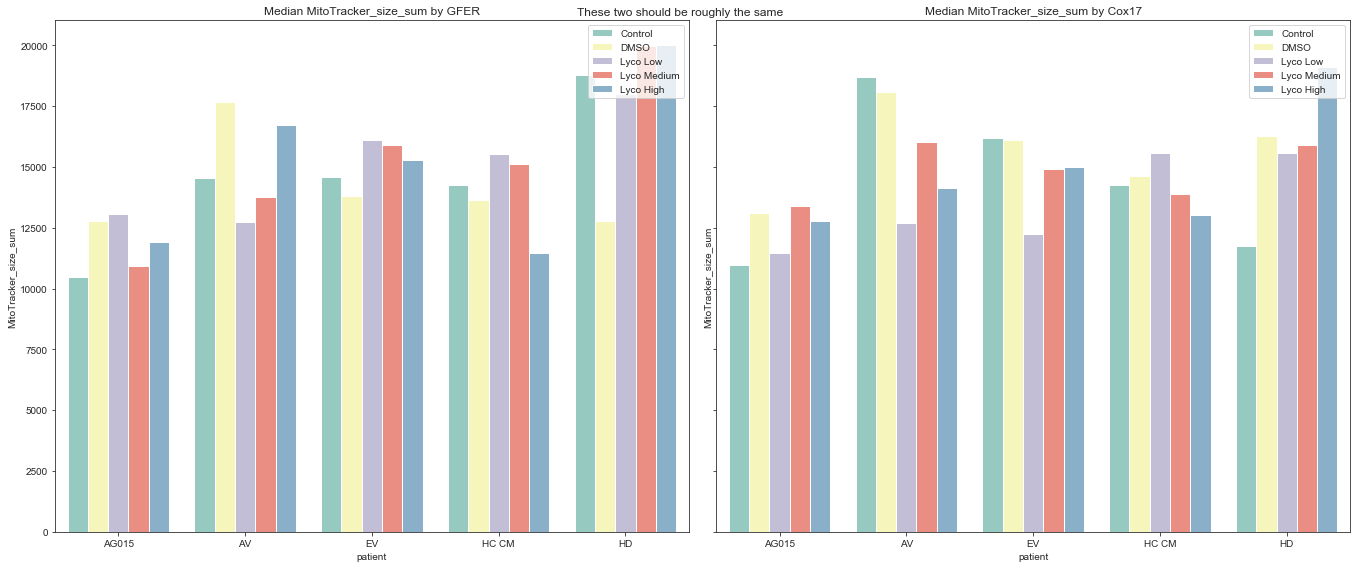

In [60]:
g=df.groupby(['AntiBodyType', 'patient' , 'Compound'], as_index=False)["MitoTracker_size_sum"].median()


sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.barplot(x="patient", y="MitoTracker_size_sum", hue="Compound", data=g[g.AntiBodyType==abType], palette="Set3" ,ax=ax[i], ci=None, hue_order=order);
    ax[i].set_title("Median MitoTracker_size_sum by "+abType)
    ax[i].legend(loc = 1)
plt.tight_layout()
plt.suptitle("These two should be roughly the same");

These two graphs should had looked the same?

I believe there are too few samples. Maybe we should use 384 plate?

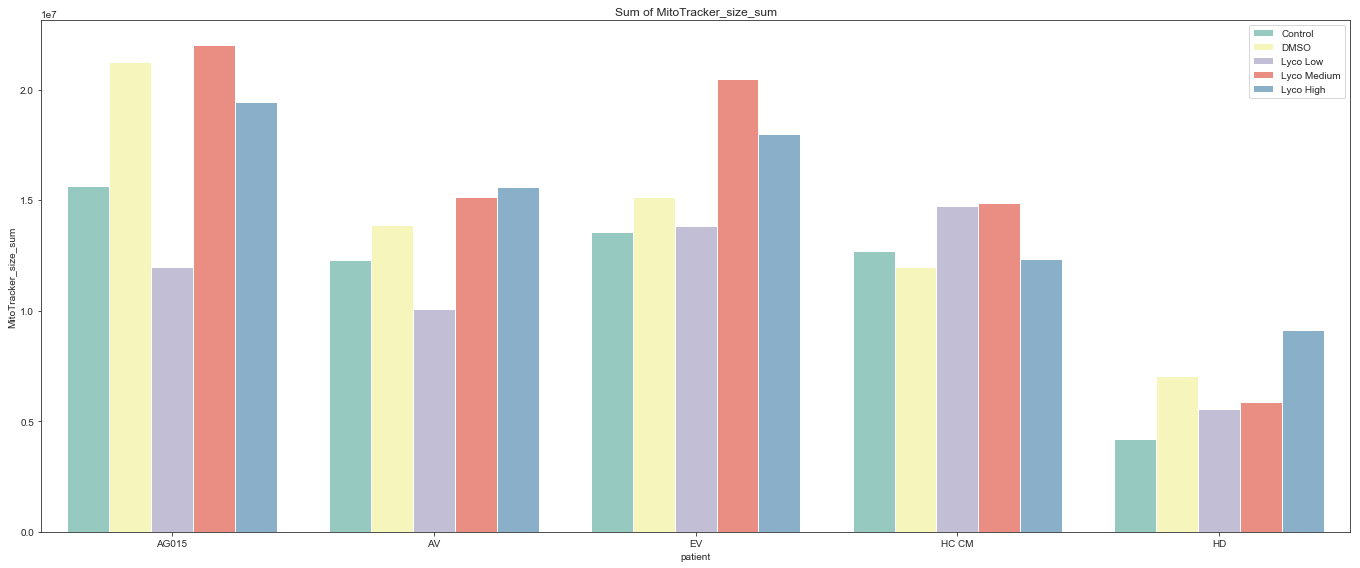

In [61]:
g=df.groupby(['patient' , 'Compound'], as_index=False)["MitoTracker_size_sum"].sum()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=False)
fig.set_size_inches(19, 8)
sns.barplot(x="patient", y="MitoTracker_size_sum", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Sum of MitoTracker_size_sum")
ax.legend(loc = 1)
plt.tight_layout()

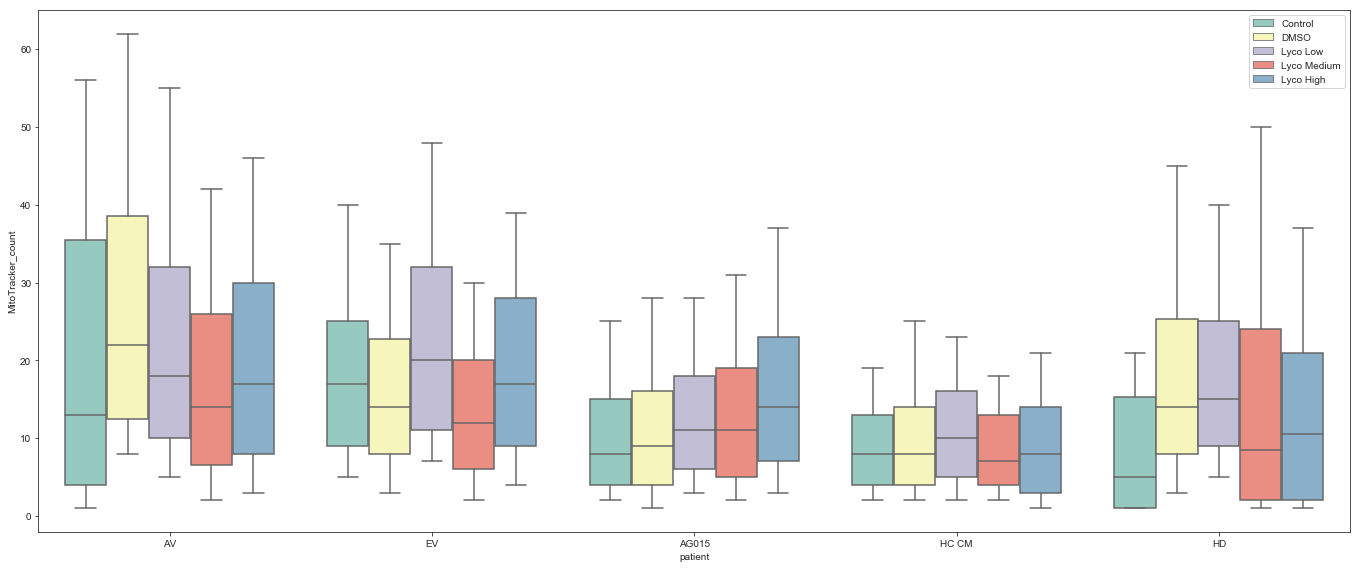

In [62]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_count", hue="Compound", data=df[df.AntiBodyType==abType], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.legend(loc=1)
plt.tight_layout()

In [63]:

g

patient     Compound  MitoTracker_size_sum
0    AG015      Control            15634856.0
1    AG015         DMSO            21244505.0
2    AG015    Lyco High            19451628.0
3    AG015     Lyco Low            11953646.0
4    AG015  Lyco Medium            22024038.0
..     ...          ...                   ...
20      HD      Control             4190039.0
21      HD         DMSO             7059003.0
22      HD    Lyco High             9105785.0
23      HD     Lyco Low             5549664.0
24      HD  Lyco Medium             5866594.0

[25 rows x 3 columns]

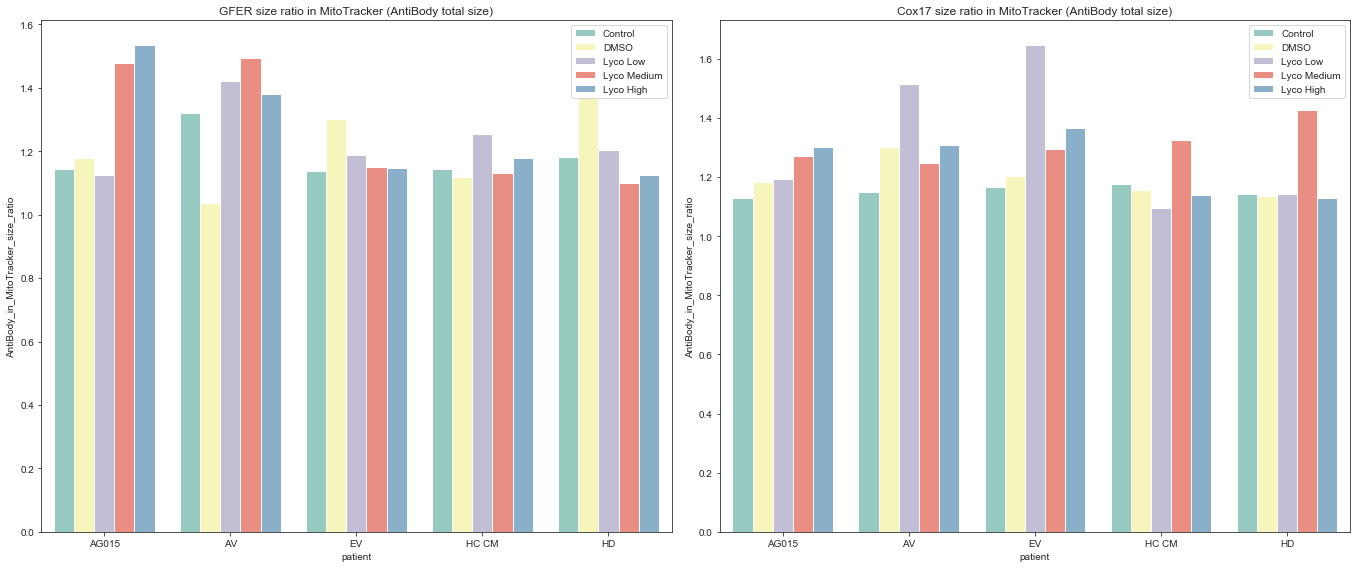

In [66]:
g=df.groupby(['AntiBodyType', 'patient' , 'Compound'], as_index=False)[["AntiBody_in_MitoTracker_size", "AntiBody_size"]].sum()
g["AntiBody_in_MitoTracker_size_ratio"] = g["AntiBody_size"]/g["AntiBody_in_MitoTracker_size"]

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.barplot(x="patient", y="AntiBody_in_MitoTracker_size_ratio", hue="Compound", data=g[g.AntiBodyType==abType], palette="Set3" ,ax=ax[i], ci=None, hue_order=order);
    ax[i].set_title(abType + " size ratio in MitoTracker (AntiBody total size)")
    ax[i].legend(loc = 1)
plt.tight_layout()

In [65]:
df.columns.tolist()

['Actin_avg',
 'Actin_max',
 'Actin_q10',
 'Actin_q50',
 'Actin_q90',
 'Actin_size',
 'Actin_std',
 'Actin_sum',
 'Cyto_area',
 'Cyto_aspect_ratio',
 'Cyto_avg',
 'Cyto_circularity_size_ratio',
 'Cyto_cx',
 'Cyto_cy',
 'Cyto_extent',
 'Cyto_h',
 'Cyto_max',
 'Cyto_min_enclosing_circle_area',
 'Cyto_perimeter',
 'Cyto_q10',
 'Cyto_q50',
 'Cyto_q90',
 'Cyto_rect_area',
 'Cyto_size',
 'Cyto_solidity',
 'Cyto_std',
 'Cyto_sum',
 'Cyto_w',
 'AntiBody_avg',
 'AntiBody_in_MitoTracker_avg',
 'AntiBody_in_MitoTracker_max',
 'AntiBody_in_MitoTracker_q10',
 'AntiBody_in_MitoTracker_q50',
 'AntiBody_in_MitoTracker_q90',
 'AntiBody_in_MitoTracker_size',
 'AntiBody_in_MitoTracker_std',
 'AntiBody_in_Nucli_avg',
 'AntiBody_in_Nucli_max',
 'AntiBody_in_Nucli_q10',
 'AntiBody_in_Nucli_q50',
 'AntiBody_in_Nucli_q90',
 'AntiBody_in_Nucli_size',
 'AntiBody_in_Nucli_std',
 'AntiBody_max',
 'AntiBody_outside_MitoTracker_avg',
 'AntiBody_outside_MitoTracker_max',
 'AntiBody_outside_MitoTracker_q10',
 'AntiBo